In [1]:
import random
import math
import time
import json
import os

import numpy as np
from PIL import Image

In [2]:
g = np.ones((2, 2))
g[0][0] = 0
g[1][1] = 0
g[0][1] = -1
g[1][0] = -1


def q(k, t):
    # column index
    i = t // img_w
    # row index
    j = t % img_w
    
    if (img[i, j, 1] > img[i, j, 2]):
        return -int(1 != k)
    elif (img[i, j, 1] < img[i, j, 2]):
        return -int(0 != k)
    else:
        return 0


_inverse_direction_dict = {0: 1, # up -> down 
                           1: 0, # down -> up 
                           2: 3, # left -> right
                           3: 2} # right -> left


def argmax_k(k_t, t, t_, n, n_):
    # k_ = 0
    val0 = g[k_t, 0] - phi[t][n][k_t] - phi[t_][n_][0]
    # k_ = 1
    val1 = g[k_t, 1] - phi[t][n][k_t] - phi[t_][n_][1]
    if val0 < val1:
        return 1
    else:
        return 0



def calculate_k(t, k_t):
    # column index
    i = t // img_w
    # row index
    j = t % img_w

    dict_best_k = dict()
    # up
    if i > 1:
        t_ = t - img_w
        # dict_best_k["up"] = (argmax_k(k_t, t, t_, 0, _inverse_dict[0]), t_)
        dict_best_k[0] = (argmax_k(k_t, t, t_, 0, _inverse_direction_dict[0]), t_)
    # down
    if i < img_h-1:
        t_ = t + img_w
        # dict_best_k["down"] = (argmax_k(k_t, t, t_, 1, _inverse_dict[1]), t_)
        dict_best_k[1] = (argmax_k(k_t, t, t_, 1, _inverse_direction_dict[1]), t_)
    # left
    if j > 1:
        t_ = t - 1
        # dict_best_k["left"] = (argmax_k(k_t, t, t_, 2,  _inverse_dict[2]), t_)
        dict_best_k[2] = (argmax_k(k_t, t, t_, 2,  _inverse_direction_dict[2]), t_)
    # right
    if j < img_w-1:
        t_ = t + 1
        # dict_best_k["right"] = (argmax_k(k_t, t, t_, 3,  _inverse_dict[3]), t_)
        dict_best_k[3] = (argmax_k(k_t, t, t_, 3,  _inverse_direction_dict[3]), t_)
    return dict_best_k


def calculate_c(best_ks, t, k):
    length = len(best_ks)
    c = 0
    for key_direction, (k_star, t_) in best_ks.items():
        c += g[k, k_star]
        c -= phi[t_][_inverse_direction_dict[key_direction]][k_star]
    c += q(k, t)
    c /= length
    return c


def update_phi(best_ks, c, t, k):
    for key_direction, (k_star, t_) in best_ks.items():
        phi[t][key_direction][k] = g[k, k_star] - phi[t_][_inverse_direction_dict[key_direction]][k_star] - c
        
        
### prediction part ###

def calculate_max(k_t, t, t_, n, n_):
    # k_ = 0
    val0 = g[k_t, 0] - phi[t][n][k_t] - phi[t_][n_][0]
    # k_ = 1
    val1 = g[k_t, 1] - phi[t][n][k_t] - phi[t_][n_][1]
    return max(val0, val1)


def predict():
    mask = np.ones((img_h, img_w))
    for t in range(img_h*img_w):
        # column index
        i = t // img_w
        j = t % img_w
        # right
        if j < img_w-1:
            t_ = t + 1
        max_k0 = calculate_max(0, t, t_, 3,  _inverse_direction_dict[3])
        max_k1 = calculate_max(1, t, t_, 3,  _inverse_direction_dict[3])
        if max_k1 >= max_k0:
            mask[i][j] = 1
        else:
            mask[i][j] = 0
    return mask

## Map_hsv

(367, 250, 3)


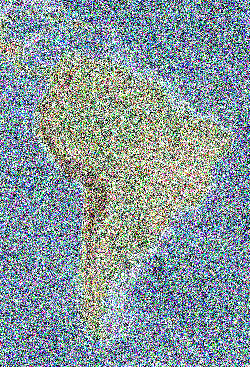

In [6]:
img_ = Image.open("./lab2_data/map_hsv.png")

img = np.array(img_)
img_h, img_w = img.shape[0], img.shape[1]
print(img.shape)
img_

In [7]:
N = 4
alpha = 1.25
g = alpha*g
print(img_h*img_w)
phi = np.zeros((img_h*img_w, N, 2), dtype=np.float32)

91750


8.092329025268555
7.789016008377075
7.382995367050171
7.458054065704346
7.7189624309539795
8.265042543411255
7.716960906982422
9.04403805732727
9.27609133720398
9.740526914596558


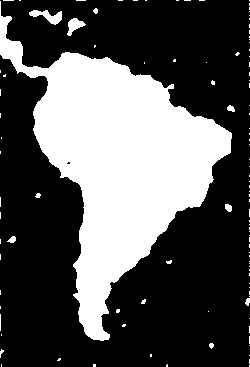

In [8]:
def q(k, t):
    # column index
    i = t // img_w
    # row index
    j = t % img_w
    
    if (img[i, j, 1] > img[i, j, 2]):
        return -int(1 != k)
    elif (img[i, j, 1] < img[i, j, 2]):
        return -int(0 != k)
    else:
        return 0


for i in range(10):
    start_time = time.time()
    # loop thoughr column
    for t in range(img_w*img_h):
        # for each k
        for k in range(2):
            best_ks = calculate_k(t, k)
            c = calculate_c(best_ks, t, k)
            update_phi(best_ks, c, t, k)
    end_time = time.time()
    print(end_time - start_time)
mask = predict()
Image.fromarray((mask*255).astype(np.uint8))

## ipt

(640, 640, 3)


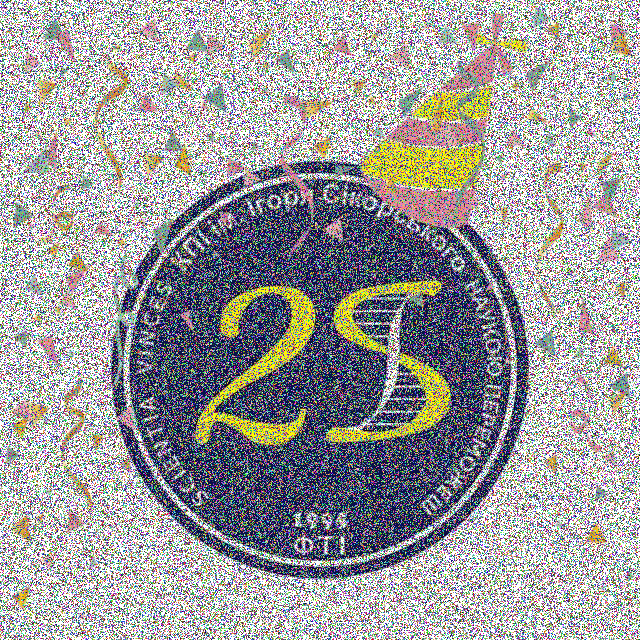

In [9]:
img_ = Image.open("./lab2_data/ipt.png")

img = np.array(img_)
img_h, img_w = img.shape[0], img.shape[1]
print(img.shape)
img_

In [10]:
N = 4
alpha = 1.25
g = alpha*g
print(img_h*img_w)
phi = np.zeros((img_h*img_w, N, 2), dtype=np.float32)

409600


C:\Users\Kirill\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
C:\Users\Kirill\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


40.74500012397766
40.675129413604736
41.957009077072144
39.15200114250183
39.00001072883606
38.465951919555664
38.04003381729126
38.484018325805664
52.12453007698059
50.9880313873291


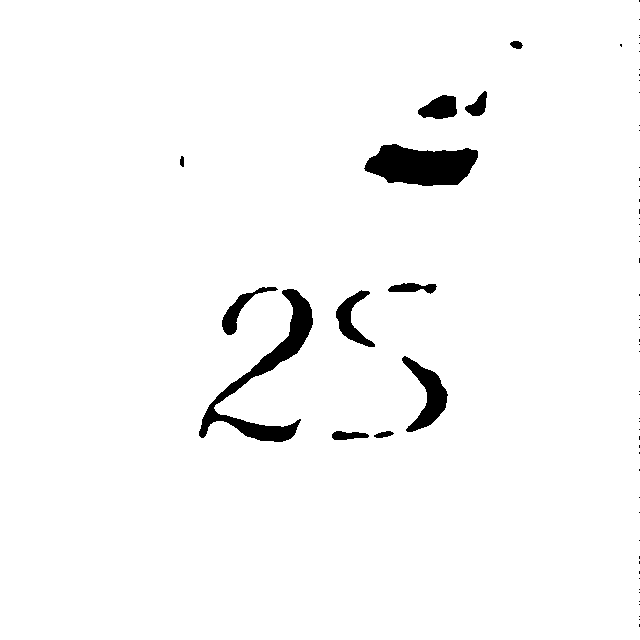

In [12]:
def q(k, t):
    # column index
    i = t // img_w
    # row index
    j = t % img_w
    
    if (img[i, j, 2] > (img[i, j, 1] + img[i, j, 0])/2):
        return -int(1 != k)
    elif (img[i, j, 2] < (img[i, j, 1] + img[i, j, 0])/2):
        return -int(0 != k)
    else:
        return 0

for i in range(10):
    start_time = time.time()
    # loop thoughr column
    for t in range(img_w*img_h):
        # for each k
        for k in range(2):
            best_ks = calculate_k(t, k)
            c = calculate_c(best_ks, t, k)
            update_phi(best_ks, c, t, k)
    end_time = time.time()
    print(end_time - start_time)
mask = predict()
Image.fromarray((mask*255).astype(np.uint8))